# 모델에 대한 설명1_PFI
* Permutation Feature Importance


## 1.환경준비

### 1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import * 

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

### 2) 데이터 로딩

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

### 3) 필요한 함수 생성

In [ ]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

## 2.데이터 준비


### 1) x, y로 나누기 

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

### 3) train : validation 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)
x_train.shape

(404, 12)

### 4) 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.Permutation Feature Importance

* model1 : SVM
* model2 : DL 

In [ ]:
from sklearn.inspection import permutation_importance

### 1) SVM 모델

In [ ]:
model1 = SVR()
model1.fit(x_train_s, y_train)

SVR()

* permutation feature importance 구하기

In [ ]:
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, 
                              scoring = 'r2', random_state=20)

In [ ]:
list(x_train)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat']

In [ ]:
pfi1

{'importances_mean': array([0.00825222, 0.02075149, 0.03748534, 0.03836567, 0.03002865,
        0.13127036, 0.06007957, 0.02657668, 0.03271986, 0.06795434,
        0.06532703, 0.21374609]),
 'importances_std': array([0.00320767, 0.00892402, 0.00548533, 0.02125708, 0.00676692,
        0.02419779, 0.01591701, 0.01959978, 0.0125917 , 0.0182994 ,
        0.00944015, 0.02210988]),
 'importances': array([[ 0.00659577,  0.01381115,  0.00876   ,  0.00950662,  0.00545895,
          0.0102616 ,  0.00665433,  0.00144125,  0.00956436,  0.01046813],
        [ 0.01995607,  0.00690167,  0.02171466,  0.01092527,  0.0103668 ,
          0.02781605,  0.02663184,  0.01790808,  0.02925473,  0.03603973],
        [ 0.04435893,  0.04169123,  0.03860817,  0.02903635,  0.02813453,
          0.03770992,  0.03499941,  0.04434237,  0.03466075,  0.04131173],
        [ 0.02320638,  0.05465367,  0.02559949,  0.06872005,  0.06229494,
          0.04039328,  0.04759392, -0.00629751,  0.04469632,  0.02279612],
        [ 

In [ ]:
pfi1.importances

array([[ 0.00659577,  0.01381115,  0.00876   ,  0.00950662,  0.00545895,
         0.0102616 ,  0.00665433,  0.00144125,  0.00956436,  0.01046813],
       [ 0.01995607,  0.00690167,  0.02171466,  0.01092527,  0.0103668 ,
         0.02781605,  0.02663184,  0.01790808,  0.02925473,  0.03603973],
       [ 0.04435893,  0.04169123,  0.03860817,  0.02903635,  0.02813453,
         0.03770992,  0.03499941,  0.04434237,  0.03466075,  0.04131173],
       [ 0.02320638,  0.05465367,  0.02559949,  0.06872005,  0.06229494,
         0.04039328,  0.04759392, -0.00629751,  0.04469632,  0.02279612],
       [ 0.04116804,  0.02913112,  0.0317482 ,  0.01507862,  0.02183353,
         0.03492659,  0.03090147,  0.0326764 ,  0.03003001,  0.03279248],
       [ 0.14641608,  0.14721048,  0.11165345,  0.14624915,  0.08594524,
         0.14706022,  0.1324093 ,  0.09614094,  0.16618336,  0.13343537],
       [ 0.07489541,  0.05481148,  0.04524862,  0.03345827,  0.03607709,
         0.08023247,  0.0646374 ,  0.07448619

* feature별 Score 분포

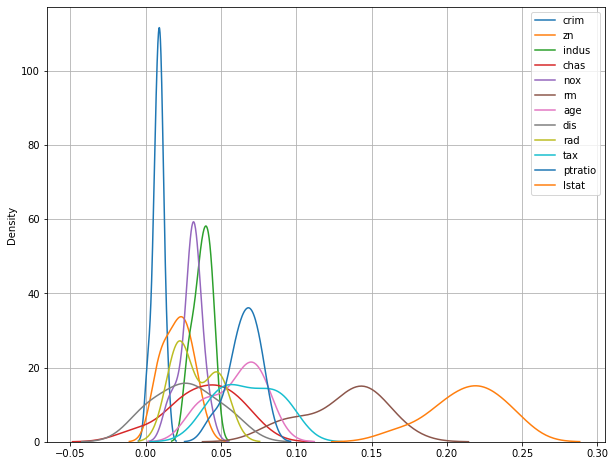

In [ ]:
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi1.importances[i], label = vars)

plt.grid()
plt.legend()
plt.show()

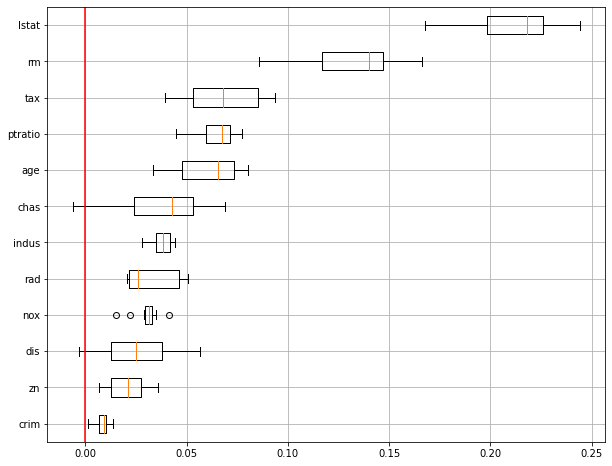

In [ ]:
sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

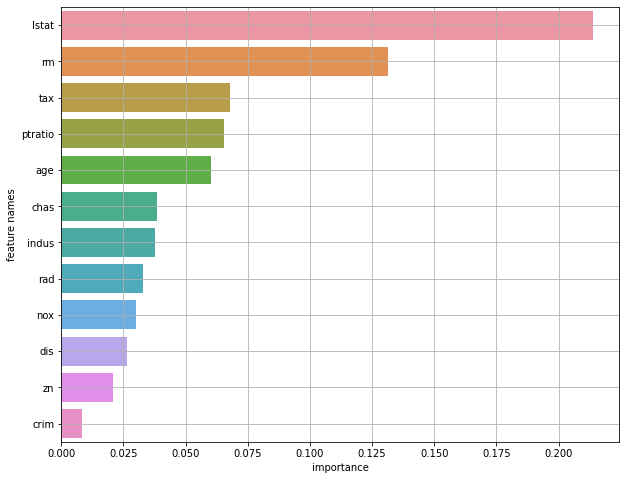

In [ ]:
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

### 2) DL 모델

* 간단한 DL 모델을 생성해 봅시다.

In [ ]:
x_train_s.shape[1]

In [ ]:
nfeatures = x_train_s.shape[1]
clear_session()

model2 = Sequential([Dense(32, input_shape = [nfeatures,], activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1)
                     ])

model2.compile(optimizer = 'adam', loss = 'mse')
history = model2.fit(x_train_s, y_train, epochs = 200, validation_split = .2).history

Epoch 1/200
11/11 [==============================] - 1s 15ms/step - loss: 623.3683 - val_loss: 584.5997
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 606.3818 - val_loss: 566.7537
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 588.3632 - val_loss: 547.9801
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 568.9126 - val_loss: 527.8271
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 547.6221 - val_loss: 505.2465
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 523.2572 - val_loss: 479.1251
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 494.9391 - val_loss: 448.9529
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 462.4715 - val_loss: 415.4296
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 427.4023 - val_loss: 378.3815
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss

* permutation feature importance 구하기
    * deep learning 모델에 대해서는 명시적으로 scoring = 'r2'을 지정해 줘야 합니다.

In [ ]:
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, 
                              scoring = 'r2', random_state=20)

In [ ]:
pfi2

* feature별 Score 분포

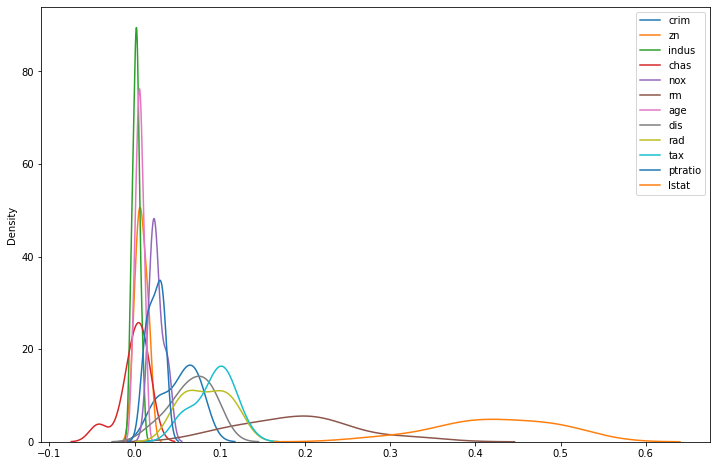

In [ ]:
plt.figure(figsize = (12,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi2.importances[i], label = vars)

plt.legend()
plt.show()

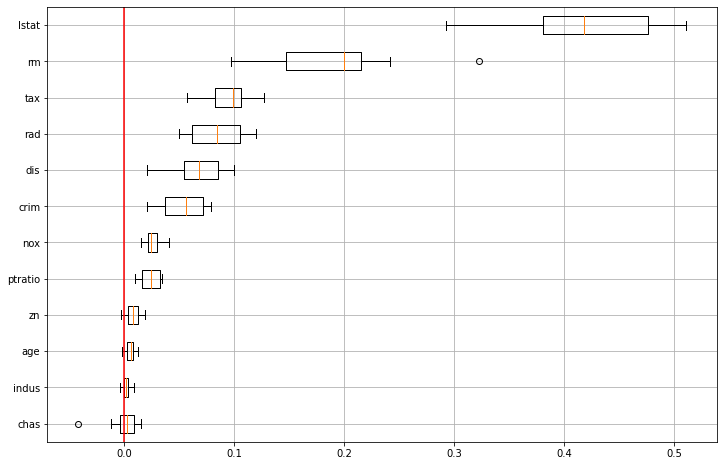

In [ ]:
sorted_idx = pfi2.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(pfi2.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

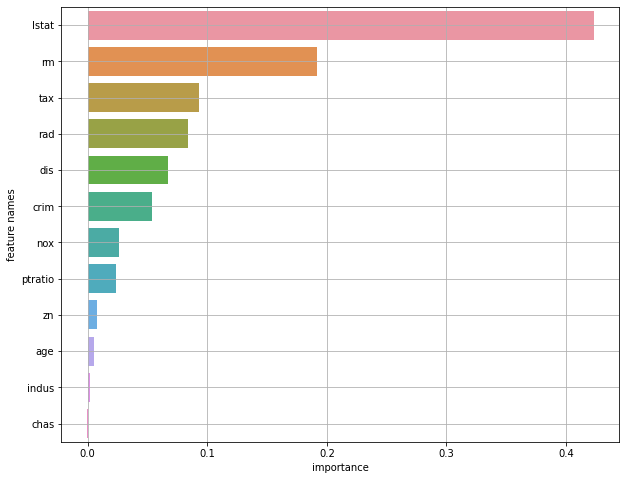

In [ ]:
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [ ]:
from sklearn.metrics import *

In [ ]:
pred1 = model1.predict(x_val_s)
print(mean_absolute_error(y_val, pred1))

3.154374560085553


In [ ]:
pred2 = model2.predict(x_val_s)
print(mean_absolute_error(y_val, pred2))

4/4 [==============================] - 0s 2ms/step
3.6193761601167562


## 4.실습 : 직원 이직 예측모델 변수 중요도 비교

### 1) 데이터 준비

* 데이터 로딩

In [ ]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


In [ ]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [ ]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화 Dummy Variable

In [ ]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [ ]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [ ]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


* class balance를 맞추기 위한 resampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
sm_x_train, sm_y_train = smote.fit_resample(x_train, y_train)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
sm_x_train_s = scaler.fit_transform(sm_x_train)
x_val_s = scaler.transform(x_val)

### 2) 모델링 및 변수 중요도 계산하기

* model1 : SVM
* model2 : KNN

In [ ]:
from sklearn.inspection import permutation_importance

#### ① SVM 모델

* 모델링

In [ ]:
model1 = SVC()
model1.fit(sm_x_train_s, sm_y_train)

SVC()

* permutation feature importance 구하기

In [ ]:
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [ ]:
pfi1

{'importances_mean': array([-4.89188231e-02, -4.07656859e-02,  1.63062744e-02,  0.00000000e+00,
        -2.44594116e-02, -9.78376462e-02, -8.15313719e-03,  6.52250975e-02,
         8.96845090e-02, -4.07656859e-02, -8.15313719e-03, -8.96845090e-02,
         1.22297058e-01,  4.07656859e-02,  0.00000000e+00,  8.96845090e-02,
         1.22297058e-01,  8.96845090e-02,  8.15313719e-03,  1.63062744e-01,
        -1.22297058e-01,  1.63062744e-02, -2.44594116e-02,  0.00000000e+00,
         1.11022302e-17,  1.22297058e-01,  0.00000000e+00,  1.63062744e-02,
        -4.89188231e-02,  2.44594116e-02, -3.26125487e-02,  0.00000000e+00,
        -6.52250975e-02, -1.30450195e-01,  8.15313719e-03, -1.63062744e-02,
         2.52747253e-01,  1.46756469e-01]),
 'importances_std': array([0.0652251 , 0.05469291, 0.04891882, 0.06315393, 0.06367804,
        0.0710774 , 0.02445941, 0.04891882, 0.04390599, 0.11089465,
        0.02445941, 0.09260184, 0.10472894, 0.09817677, 0.03646194,
        0.06772504, 0.0657326

* feature별 Score 분포

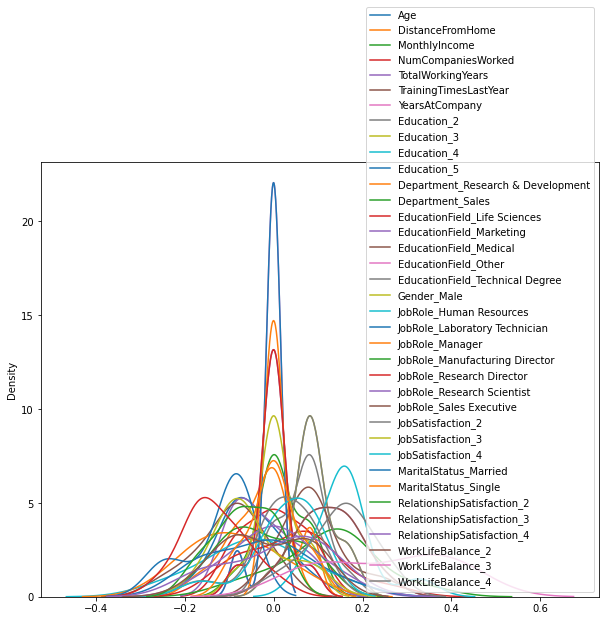

In [ ]:
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi1.importances[i], label = vars)

plt.legend()
plt.show()

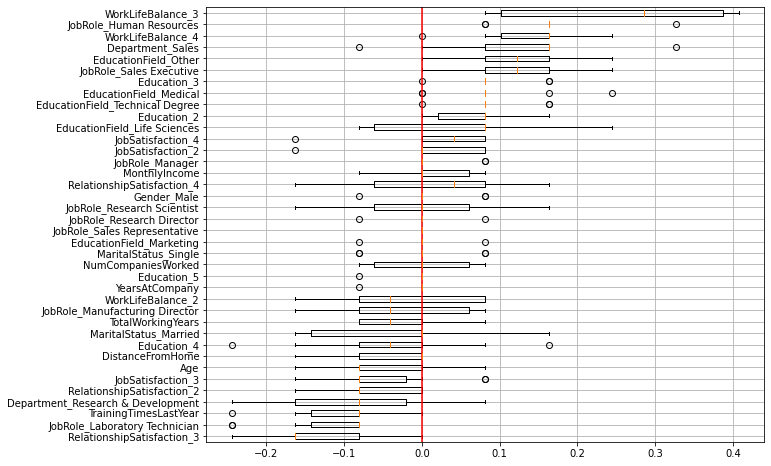

In [ ]:
sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

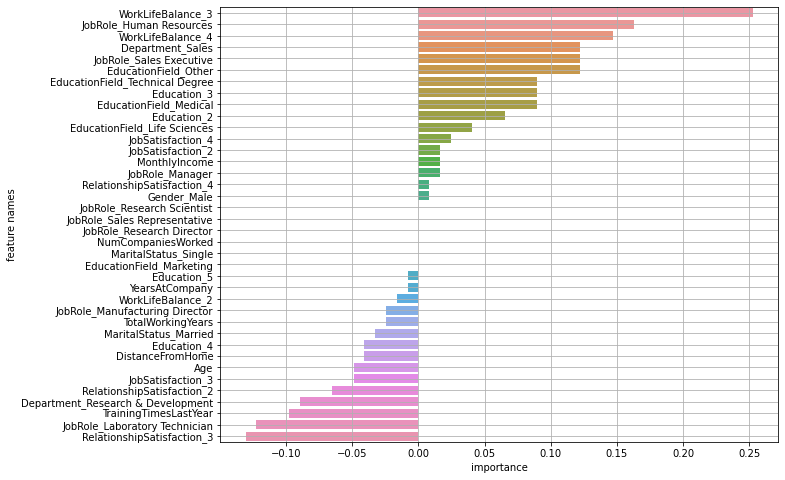

In [ ]:
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

* 예측 및 평가

In [ ]:
pred1 = model1.predict(x_val_s)
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[[214   3]
 [ 11   2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       217
           1       0.40      0.15      0.22        13

    accuracy                           0.94       230
   macro avg       0.68      0.57      0.60       230
weighted avg       0.92      0.94      0.93       230



#### ② KNN 모델

* 모델링

In [ ]:
model2 = KNeighborsClassifier()
model2.fit(sm_x_train_s, sm_y_train)

KNeighborsClassifier()

* permutation feature importance 구하기

In [ ]:
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

* feature별 Score 분포

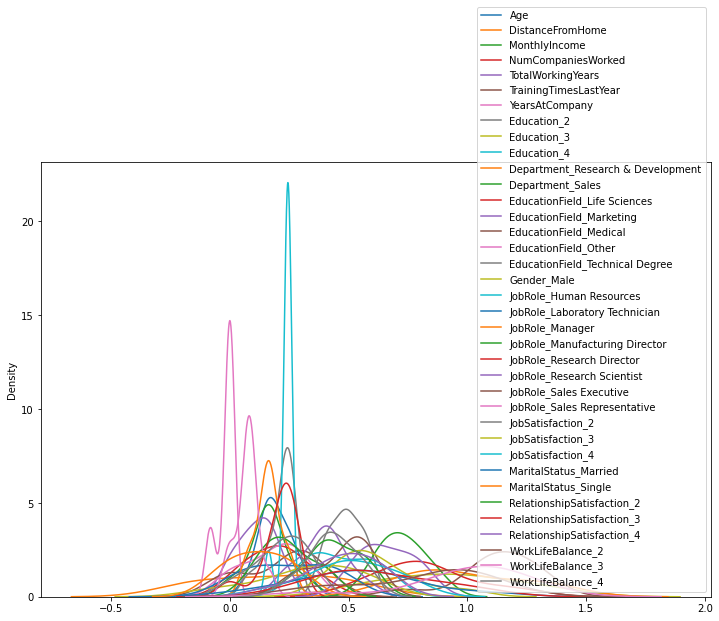

In [ ]:
plt.figure(figsize = (12,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi2.importances[i], label = vars)

plt.legend()
plt.show()

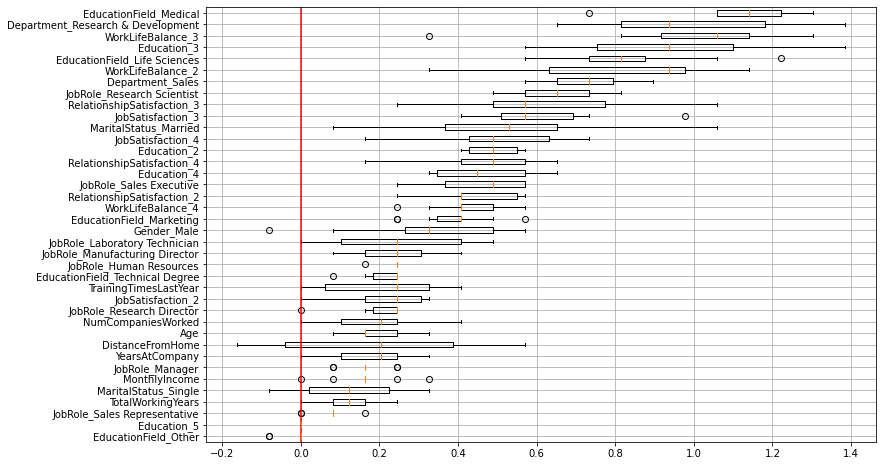

In [ ]:
sorted_idx = pfi2.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(pfi2.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

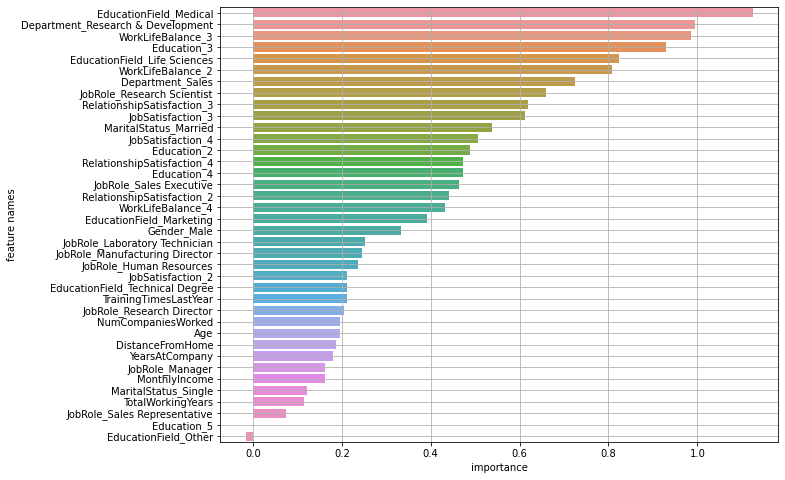

In [ ]:
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [ ]:
pred2 = model2.predict(x_val_s)
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[193  24]
 [  7   6]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       217
           1       0.20      0.46      0.28        13

    accuracy                           0.87       230
   macro avg       0.58      0.68      0.60       230
weighted avg       0.92      0.87      0.89       230

